# **1. Download datasets**

In [ ]:
!gdown 1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R

Downloading...
From: https://drive.google.com/uc?id=1N7rk-kfnDFIGMeX0ROVTjKh71gcgx-7R
To: /content/2cls_spam_text_cls.csv
100% 486k/486k [00:00<00:00, 28.5MB/s]


**Essential libraries** are imported, including:
- **nltk** for natural language processing (NLP), with downloads for stopwords and tokenizers.
- **pandas** and **numpy** for data manipulation.
- **matplotib** for visualization.
- **sklearn** for model training and evaluation.

**nltk:** A powerful library for NLP tasks. Here, stopwords and tokenizers are downloaded for further use in preprocessing.

In [ ]:
# Import essential libraries
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


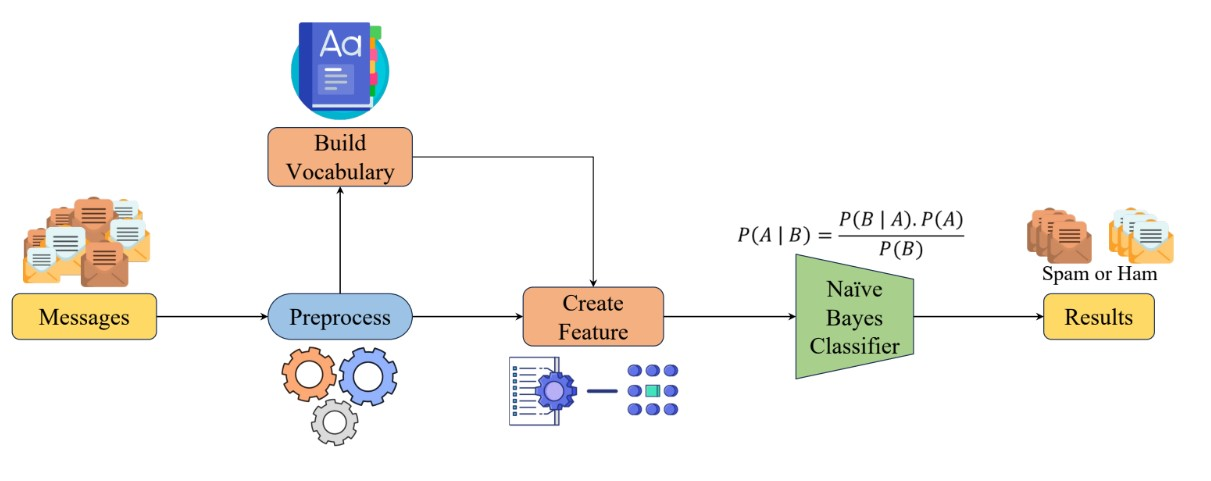

In [ ]:
from IPython.display import Image, display
display(Image(filename='/content/pipeline.jpg'))

# **2. Read Dataset**

In [ ]:
dataset_path = '/content/2cls_spam_text_cls.csv'
df = pd.read_csv(dataset_path)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['Message'].values

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [ ]:
messages = df['Message'].values.tolist()
labels = df['Category'].values.tolist()

# **3. Data Preparation**

## **3.1. Label Encoding**

In [ ]:
label = LabelEncoder()
y = label.fit_transform(labels)

This code uses **LabelEncoder** to convert the labels into numerical values. This means the labels spam and ham are converted into corresponding integers, such as 0 and 1.

In [ ]:
print(f'Classes: {label.classes_}')
print(f'Encoded labels: {y}')

Classes: ['ham' 'spam']
Encoded labels: [0 0 1 ... 0 0 0]


## **3.2. Feature Creation**

**Preprocessing involves:**


1.   **Cleaning the text:** Remove unnecessary characters, punctuation, and numbers that do not contribute to the meaning of the message.
2.   **Tokenization:** Split the text into individual words (tokens).
3.   **Removing stop words:** Common words like "the," "is," and "and" that do not provide significant meaning are removed.
4.   **Stemming or Lemmatization:** Reduce words to their base or root form, so "running" becomes "run."



In [ ]:
def lowercase(text):
    return text.lower()

def punctuation_removal(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = nltk.corpus.stopwords.words('english')
    return [token for token in tokens if token not in stop_words]

def stemming(tokens):
    stemmer = nltk.PorterStemmer()
    return [stemmer.stem(token) for token in tokens]

def preprocess_text(text):
    text = lowercase(text)
    text = punctuation_removal(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)
    return tokens

messages = [preprocess_text(message) for message in messages]

In [ ]:
messages

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat'],
 ['ok', 'lar', 'joke', 'wif', 'u', 'oni'],
 ['free',
  'entri',
  '2',
  'wkli',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkt',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receiv',
  'entri',
  'questionstd',
  'txt',
  'ratetc',
  'appli',
  '08452810075over18'],
 ['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say'],
 ['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though'],
 ['freemsg',
  'hey',
  'darl',
  '3',
  'week',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chg',
  'send',
  '£150',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'mell',
  'mell',
  'oru',
  'minnaminungint',
  'nurungu',
  'vettam',
  'set',
  'callertun',
  'caller',
  'press',
  '9',
  'copi',
  '

In [ ]:
def create_dictionary(messages):
    dictionary = []
    for tokens in messages:
        for token in tokens:
            if token not in dictionary:
                dictionary.append(token)
    return dictionary

In [ ]:
dictionary = create_dictionary(messages)
dictionary

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 '2005',
 'text',
 '87121',
 'receiv',
 'questionstd',
 'txt',
 'ratetc',
 'appli',
 '08452810075over18',
 'dun',
 'say',
 'earli',
 'hor',
 'c',
 'alreadi',
 'nah',
 'dont',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'id',
 'like',
 'fun',
 'still',
 'tb',
 'xxx',
 'std',
 'chg',
 'send',
 '£150',
 'rcv',
 'even',
 'brother',
 'speak',
 'treat',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 '£900',
 'prize',
 'reward',
 'claim',
 'call',
 '0

In [ ]:
def create_features(tokens, dictionary):
    features = np.zeros(len(dictionary))
    for token in tokens:
        if token in dictionary:
            features[dictionary.index(token)] += 1
    return features

In [ ]:
X = np.array([create_features(tokens, dictionary) for tokens in messages])
X

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **3.3. Divide data into train/valid/test**

In [ ]:
VAL_SIZE = 0.2
TEST_SIZE = 0.125

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=True, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=VAL_SIZE, shuffle=True, random_state=0)

# **4. Training**

**MODEL SELECTION:**

**Naive Bayes:** This is a simple but effective probabilistic classification model. It assumes that the words in the text are independent of each other (this assumption is not entirely accurate in reality, but it still yields good results).

The formula for calculating the probability that a message belongs to the **spam (S)** or **ham (H)** class based on the words appearing in that message is as follows:

  $P(S|X) = \dfrac{P(X|S) \cdot P(S)}{P(X)}$

  $P(H|X) = \dfrac{P(X|H) \cdot P(H)}{P(X)}$

In [ ]:
model = GaussianNB()
model = model.fit(X_train, y_train)

# **5. Model Evaluation**

In [ ]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Val accuracy: {val_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Val accuracy: 0.882051282051282
Test accuracy: 0.8708751793400287


# **6. Demo**

In [ ]:
def predict(text, model, dictionary):
    processed_text = preprocess_text(text)
    features = create_features(text, dictionary)
    features = np.array(features).reshape(1, -1)

    prediction = model.predict(features)
    output = label.inverse_transform(prediction)[0]

    return output

In [ ]:
#Test 1
test_input = 'I am actually thinking a way of doing something useful'
output = predict(test_input, model, dictionary)
print(f'Prediction: {output}')

Prediction: ham


In [ ]:
#Test 2
test_input = 'I hate going out with him!'
output = predict(test_input, model, dictionary)
print(f'Prediction: {output}')

Prediction: ham
